# SKIN CANCER PREDICTOR USING SUPPORT VECTOR MACHINE (SVM)

## Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

<h2 id="load_dataset">Load the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

<br>
<br>

## Importing DataSet

In [9]:
df=pd.read_csv("cell_samples.csv")
df.head(14)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Visualization

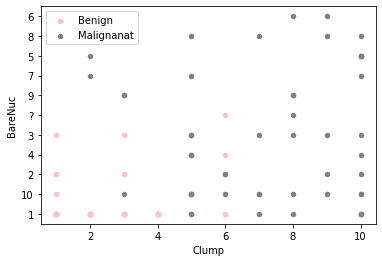

In [10]:
ax1=df[df["Class"]==2][0:50].plot(kind="scatter",x="Clump",y="BareNuc",color="pink",label="Benign")
df[df["Class"]==4][0:50].plot(kind="scatter",x="Clump",y="BareNuc",color="grey",ax=ax1,label="Malignanat")
plt.legend(loc="upper left")
plt.show()

# Pre-Processing

In [11]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [12]:
df=df[pd.to_numeric(df["BareNuc"],errors="coerce").notnull()]
df["BareNuc"]=df["BareNuc"].astype("int")
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Making X:

In [13]:
features=df[["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]
x=np.asarray(features)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

# Making Y:

In [14]:
y=np.asarray(df["Class"])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

# Making Training And Testing Set:

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# SVM Model Training

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

In [16]:
from sklearn import svm
clf=svm.SVC(kernel="linear").fit(x_train,y_train)
clf

SVC(kernel='linear')

# Prediction

In [17]:
yhat=clf.predict(x_test)
yhat

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

# Evalution

In [18]:
from sklearn.metrics import jaccard_score,f1_score,classification_report

In [19]:
#Jaccard Score
print("The accuracy of the model is:%.2F "%(jaccard_score(yhat,y_test,pos_label=2)*100))

The accuracy of the model is:94.44 


In [20]:
#F1 Score
f1_score(yhat,y_test,average="weighted")

0.9631034010596053

In [25]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           2       0.94      1.00      0.97        85
           4       1.00      0.90      0.95        52

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.97      0.96      0.96       137



In [26]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

In [27]:
cnf=confusion_matrix(yhat,y_test,labels=[2,4])
cnf

array([[85,  0],
       [ 5, 47]], dtype=int64)

In [28]:
#seaborn visualization of coonfusion matrix

In [29]:
import seaborn as se

<AxesSubplot:>

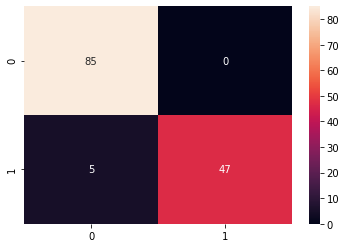

In [30]:
se.heatmap(cnf,annot=True)

# Defining Prediction Function:

In [35]:
#[[ "Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit" ]]

def data(Clump,Unifsize,Unifshape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit):
    new=[[Clump,Unifsize,Unifshape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit]]
    pr=clf.predict(new)
    if pr==4:
        print("The Cancer type is : MALIGNANT")
    else:
        print("The Cancer type is : BENIGN")



# Input Patient Data To Predict

#### Input these perameters in the form of array: 
 ####  [[ "Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit" ]]
 
 | Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

#### NOTE: Input perameters should be integers


In [34]:
#new=[[8,10,10,8,7,10,9,7,1]]

data(8,10,10,8,7,10,9,7,1)

The Cancer type is : MALIGNANT


In [36]:
#new=[[6,8,8,1,3,4,3,7,1]]

data(6,8,8,1,3,4,3,7,1)

The Cancer type is : MALIGNANT


In [37]:
#new=[[3,1,1,1,2,2,3,1,1]]

data(3,1,1,1,2,2,3,1,1)

The Cancer type is : BENIGN
